<img src="https://raw.githubusercontent.com/numpy/numpy/181f273a59744d58f90f45d953a3285484c72cba/branding/logo/primary/numpylogo.svg" width="25%" height="25%" />

# NumPy - Unit 09 - Combine NumPy and Images

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Combine **Images and NumPy arrays**


## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Combine NumPy and Images

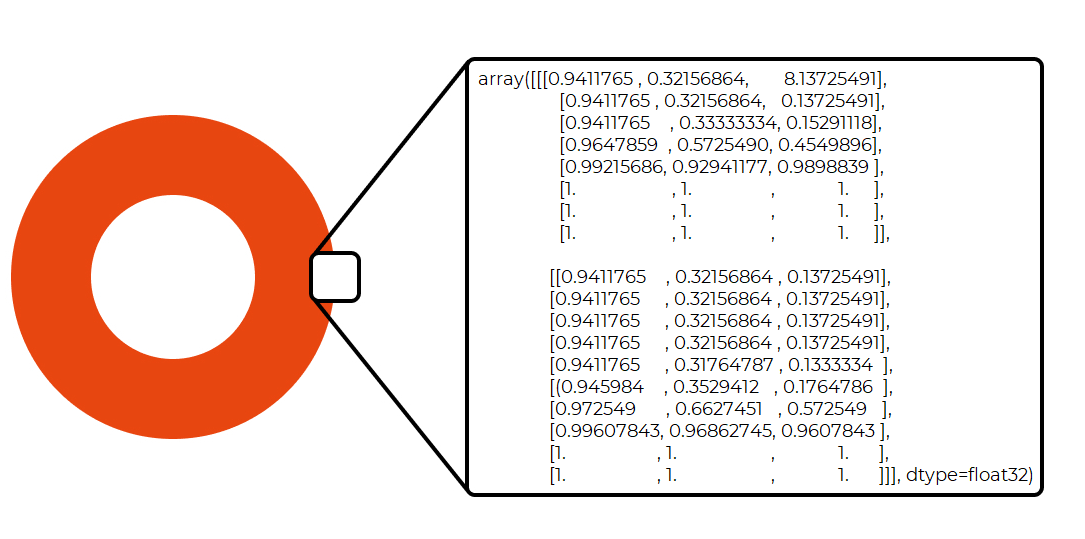

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Machine Learning has incredible applications when it comes to **imaging**. The image data handled in such applications are typically NumPy arrays.


The matplotlib package imported below will be studied in more detail in future units. For this exercise, you just need to be aware it is used to import and display the image file. 

import matplotlib.pyplot as plt
import PIL
import urllib

We will consider the Code Institute logo image, taken from a URL.

image_url = "https://ci-jshint.herokuapp.com/static/images/logo.png"

We import the image from this URL using `urlopen` and `open` functions from the request and Pillow libraries, respectively.

image_data = urllib.request.urlopen(image_url)
image = PIL.Image.open(image_data)
np_image = np.array(image)

We check the variable's type. It is an array, so you can apply what you have learned so far

type(np_image)

We can display the image with `plt.imshow()` function

plt.imshow(np_image)

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Please run the cell below **before reading** the next few statements.
* When checking the shape, it will have this order: height, width, channels (or depth). 
  * Each array element is an image pixel, in this case, 331 pixels for height x 753 pixels for width.
* The last item in the array shape is 4, which shows the colour layers composition - channels: Red-green-blue-alpha (RGBA). 
  * The image could have had 3 channels - RGB. But the image from that particular URL has 4 channels (RGBA)
* Note the min value is 0 and the max value is 1. 
 * The image is not normalised, so it is in the 0-255 range, but typically, it would be normalised by processing to fit within the 0-1 range. This can be done by simply dividing the array by 255. However, this was not the case.
  * You will notice the array values are 0 when you print the array. That doesn't mean all values are zero. It means that the portion of the array content displayed using print() is zero. We will have an example later where we will see values other than 0. 

print(
  f" * Array shape: {np_image.shape} \n"
  f" * Array data type : {np_image.dtype} \n"
  f" * Min value : {np_image.min()} \n"
  f" * Max value : {np_image.max()} \n"
  f" * Array content: \n\n {np_image}"
)

You can slice the image and grab only a piece of the image, say from pixel 30 to pixel 100 of height x last 50 pixels of width, and all channels (depths)

plt.imshow(np_image[30:100,-50:,:])

If you check the array content with print() for this interval, you will notice values different from zero. 
  * The first values shown using the print() statement are typically the ones from the top left corner.

print(np_image[30:100,-50:,:])

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**: Grab parts of the image following the instructions below
  * The height should be between 250 and 370 pixels
  * The width should be between 350 and 900 pixels
  * All channels


Your output should contain the word "institute"

# write your code here
plt.imshow(np_image[250:370,350:900,:])

---

Now you would like to process the image
* You can flip the array; therefore the image, using the `np.flip()` function. If `axis = 1`, it flips vertically

plt.imshow(np.flip(np_image, axis=1))

* If `axis = 0`, it flips horizontally. 

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**: Try yourself in the cell below:

# write your code here
plt.imshow(np.flip(np_image, axis=0))

You can multiply the array (or the image) by 2
* You will notice that for the computer, this image is just a set of numbers arranged into an array. But for us, these set of numbers are understood as an image
  * Multiplying by 2 doesn't have a particular meaning; when the array elements change, so does the image.

plt.imshow(np_image*2)

You can get the array and raise it to the power of 2
  * Note that when the array's elements are processed and therefore change their values, the output image is different

plt.imshow(np_image**2)

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> There are many more use cases for processing images with NumPy array. 
* We just presented simple and quick use cases, so you can relate how arrays can be used in practical terms.

---

Now we are considering an image with three channels - RGB - and we are interested in a subset of the channels to process. 
* Consider the image below and its respective shape

image_url_rgb = "https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_images/Numpy_rainbow.png"
image_rgb = PIL.Image.open(urllib.request.urlopen(image_url_rgb))
#plt.imread(image_url_rgb) is depricated
np_image_rgb = np.array(image_rgb)
print(f"* Array shape: {np_image_rgb.shape} ===> 3 channels (RGB)")
plt.imshow(np_image_rgb);  

We want to **see only the Red channel**. To do that, we "shut down" the other channels by assigning zero to them
* Remember you can access the channels, as they are the last item when subsetting the array
  * array[ height : width : channels ]
    * Red is the first channel, therefore is the index 0.
    * Green is index 1, and Blue is index 2
  * We will assign 0 to the channel green and blue
  * You will notice the red is more intense top-left.  However, in the lower-right, the red channel is not so present.

image_red_only = np_image_rgb.copy()
image_red_only[:, :,1] = 0  # This is the Green channel, we "shut down" it here
image_red_only[:, :,2] = 0  # This is the Blue channel, we "shut down" it here

plt.imshow(image_red_only);

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** Create an array **image_blue_only** with only the blue channel active
  * Start copying the original image (np_image_rgb) to image_blue_only array
  * Then set the Red and Green channels to 0 (you can do with 2 lines of code)
  * Display image_blue_only array using plt.imshow()

image_blue_only = np_image_rgb.copy()

# Set Red Channel to 0
# Set Green Channel to 0
image_blue_only[:,:,0] = 0  # This is the Green channel, we "shut down" it here
image_blue_only[:,:,1] = 0  # This is the Blue channel, we "shut down" it here

plt.imshow(image_blue_only);
# Display image_blue_only image

We will get back now to our original image, **np_image_rgb** , and we will now **shut down ONLY the red channel**. 
  * Before running the line below, can you guess the result? Remember that the channel colours are red, blue and green

image_red_off = np_image_rgb.copy()
image_red_off[:, :,0] = 0  # This is the Red channel, we "shut down" it here

plt.imshow(image_red_off);

We will go back now to our original image, **image_rgb**, and we will **process the red channel** by multiplying it using a random number from a normal distribution
  * We will create an array called processor, with np.random.randn(). The arguments are the image size: 240 x 240
  * We then multiply the red channel by the previous array. 
* Note, only the "red part" of the image is changed.

image_red_processed = np_image_rgb.copy()

np.random.seed(seed=101)
image_processor = np.random.randn(np_image_rgb.shape[0], np_image_rgb.shape[1])
image_red_processed[:, :,0] = image_red_processed[:, :,0] * image_processor  # This is the Red channel, 

plt.imshow(image_red_processed);

---

**You learned previously how to create a 3-D array and visualize it**. Now you can also **display it as an image**.
  *  Here we use `np.random.randint()`. Say that it is an RGB image and has 500 pixels of width and 300 pixels of height
  * The image below may look like an old TV when it was not synced or not working properly :)

arr = np.random.randint(low=0,high=255,size=(300,500,3))
plt.imshow(arr)

---

 * Array shape: (331, 753, 4) 
 * Array data type : uint8 
 * Min value : 15 
 * Max value : 255 
 * Array content: 

 [[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


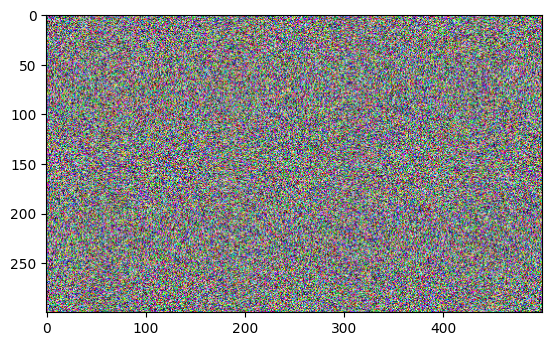

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import urllib

# Code Institute logo image URL
image_url = "https://ci-jshint.herokuapp.com/static/images/logo.png"

# Importing the image from the URL
image_data = urllib.request.urlopen(image_url)
image = PIL.Image.open(image_data)
np_image = np.array(image)

# Displaying the image
plt.imshow(np_image)

# Checking the variable's type
type(np_image)

# Printing information about the image array
print(
  f" * Array shape: {np_image.shape} \n"
  f" * Array data type : {np_image.dtype} \n"
  f" * Min value : {np_image.min()} \n"
  f" * Max value : {np_image.max()} \n"
  f" * Array content: \n\n {np_image}"
)

# Slicing the image
plt.imshow(np_image[250:370,350:900,:])

# Flipping the image horizontally
plt.imshow(np.flip(np_image, axis=0))

# Multiplying the image array by 2
plt.imshow(np_image * 2)

# Raising the image array to the power of 2
plt.imshow(np_image ** 2)

# Importing an RGB image
image_url_rgb = "https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_images/Numpy_rainbow.png"
image_rgb = PIL.Image.open(urllib.request.urlopen(image_url_rgb))
np_image_rgb = np.array(image_rgb)

# Displaying the RGB image
plt.imshow(np_image_rgb)

# Creating an array with only the red channel
image_red_only = np_image_rgb.copy()
image_red_only[:, :,1] = 0  # Shutting down the Green channel
image_red_only[:, :,2] = 0  # Shutting down the Blue channel
plt.imshow(image_red_only)

# Creating an array with only the blue channel
image_blue_only = np_image_rgb.copy()
image_blue_only[:,:,0] = 0  # Shutting down the Red channel
image_blue_only[:,:,1] = 0  # Shutting down the Green channel
plt.imshow(image_blue_only)

# Shutting down the red channel
image_red_off = np_image_rgb.copy()
image_red_off[:, :,0] = 0  # Shutting down the Red channel
plt.imshow(image_red_off)

# Processing the red channel
image_red_processed = np_image_rgb.copy()
np.random.seed(seed=101)
image_processor = np.random.randn(np_image_rgb.shape[0], np_image_rgb.shape[1])
image_red_processed[:, :,0] = image_red_processed[:, :,0] * image_processor
plt.imshow(image_red_processed)

# Creating a 3-D array and displaying it as an image
arr = np.random.randint(low=0,high=255,size=(300,500,3))
plt.imshow(arr)
